<a href="https://www.kaggle.com/code/bensonwamae/wip-crisp-dm-housing-sale-prediction-xg-boost?scriptVersionId=134998947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
pd.set_option('max_columns', 100)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Business Undestanding
The ACME Bank would like to understand which factors affect House Sale Prices so that they can focus their advertising efforts.

# **Exploratory Data Analysis**
Here we are going to look at the data and hopefully find interesting patterns in it.

There are a few assumptions that we will make and explore the data to see if these assumptions are true.\
Usually when shopping for a house people might consider the following items:
* Construction date
* House area
* Neighbourhood
* Number of rooms
* Parking area

We will try and see if the the above items have a strong correlation to the **SalePrice**

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We have the following different data types to work with

In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

## Checking for Nulls
Considering we have 1460 rows, we will have to drop some of the null rows/columns 
but before doing that we have to figure out if the *nulls* have any significant meaning or not

In [ ]:
# TODO: Show percentage of null column
df_nulls_percentage = df.isna().sum().sort_values(ascending=False) / len(df) * 100

# Plotting
df_nulls_percentage.plot(kind='bar', figsize=(10, 7))
plt.ylabel('Percentage of Null Values (%)')
plt.xlabel('Columns')
plt.title('Percentage of Null Values by Column')
plt.show()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The mean is larger than the median meaning that there are some large values for **SalePrice**.\
These could be outtliers but further investigation is needed

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

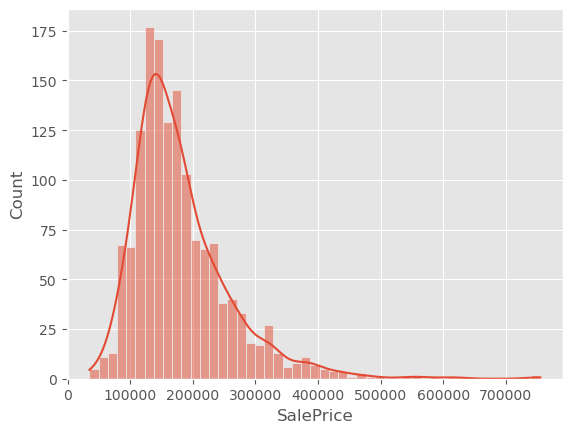

In [8]:
# TODO: Fix labels on x axis
sns.histplot(df['SalePrice'],kde=True)

# Skewness and Kurtosis

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The scatter diagram below shows a positive correllation between **GrLivArea** and **SalePrice**.\
There are a few outliers, it is odd that the **GrLivArea** increases but the price stays relatively the same for the outliers.

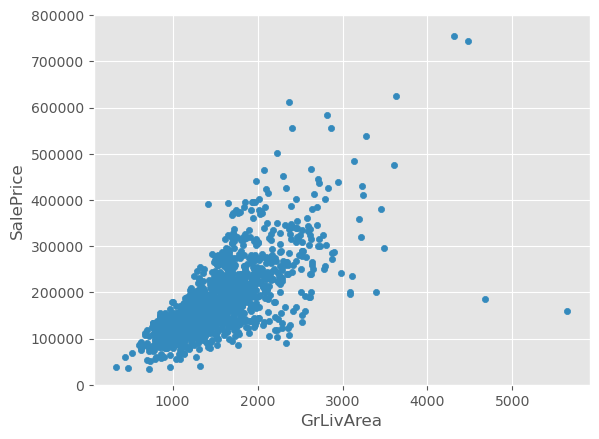

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

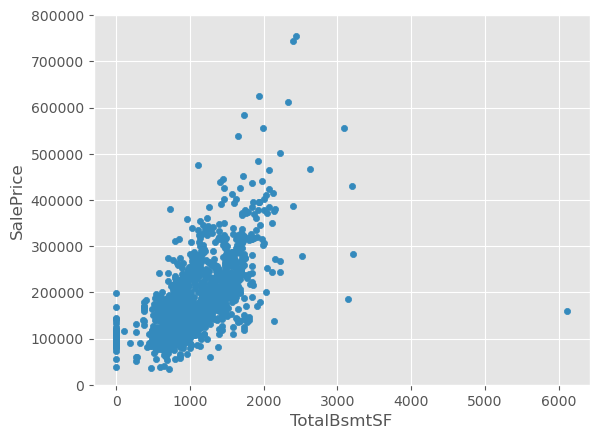

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The heatmap will allow us to view the different correlations in a much more intuitive way.


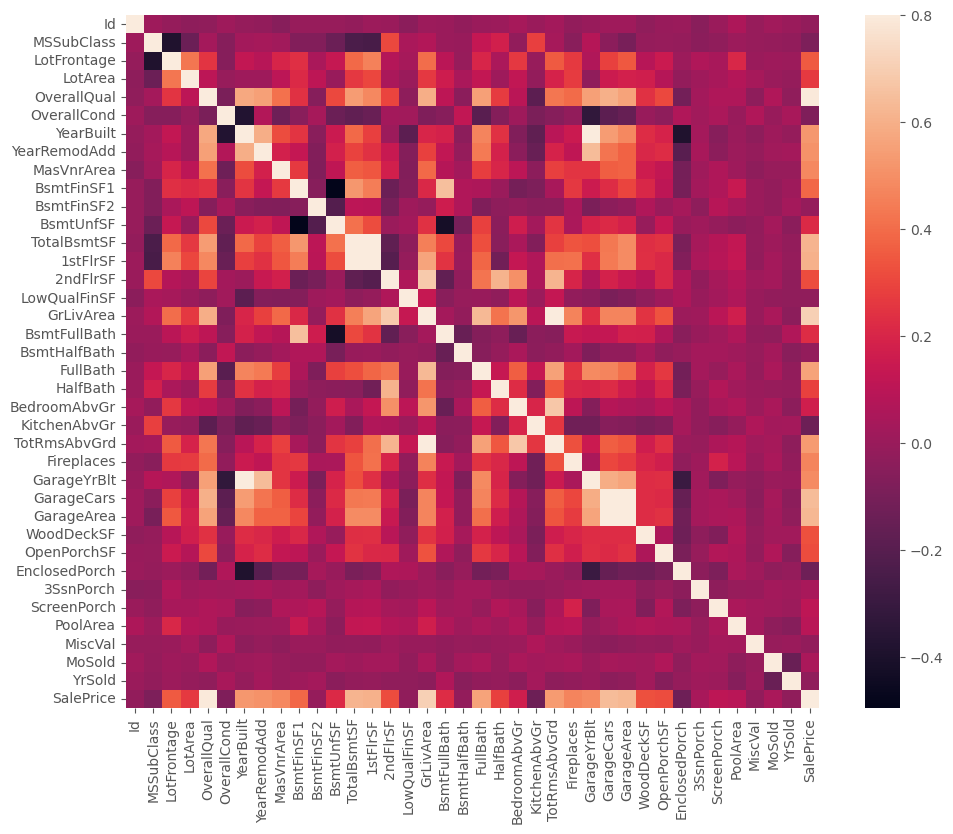

In [12]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

We can see here that the following columns have strong correlation to the **SalePrice**
* LotFrontage
* LotArea
* OverrallQual
* YearBuilt
* YearRemodAdd
* MasVnrArea
* BsmtFinSF2
* OpenPorchSF
* WoodDeckSF
* GarageArea
* GarageCars
* GarageYearBlt
* FirePlaces
* TotsRmsAbvGrd
* FullBath
* Halfbath
* GrLivArea
* 1stFlrSF
* 2ndFlrSF
* TotalBsmtSF ...

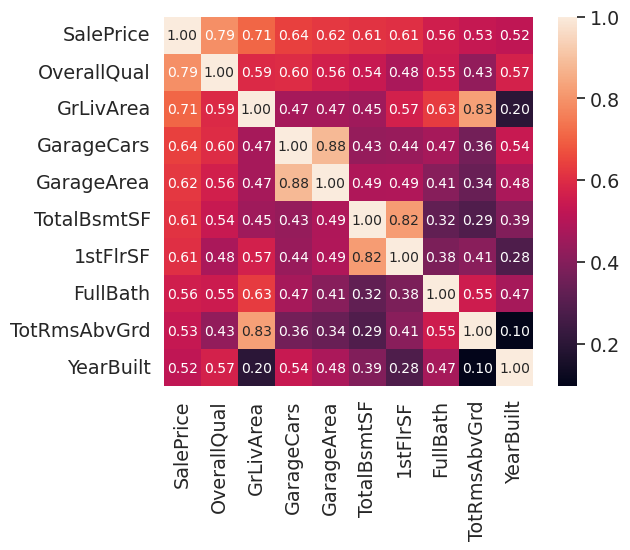

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
#Drop to avoid multicolinearlity (Does not apply when using XGBoost)
df = df.drop(['GarageArea'], axis=1)
df = df.drop(['1stFlrSF'], axis=1)

In [15]:
#deleting outlier points
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

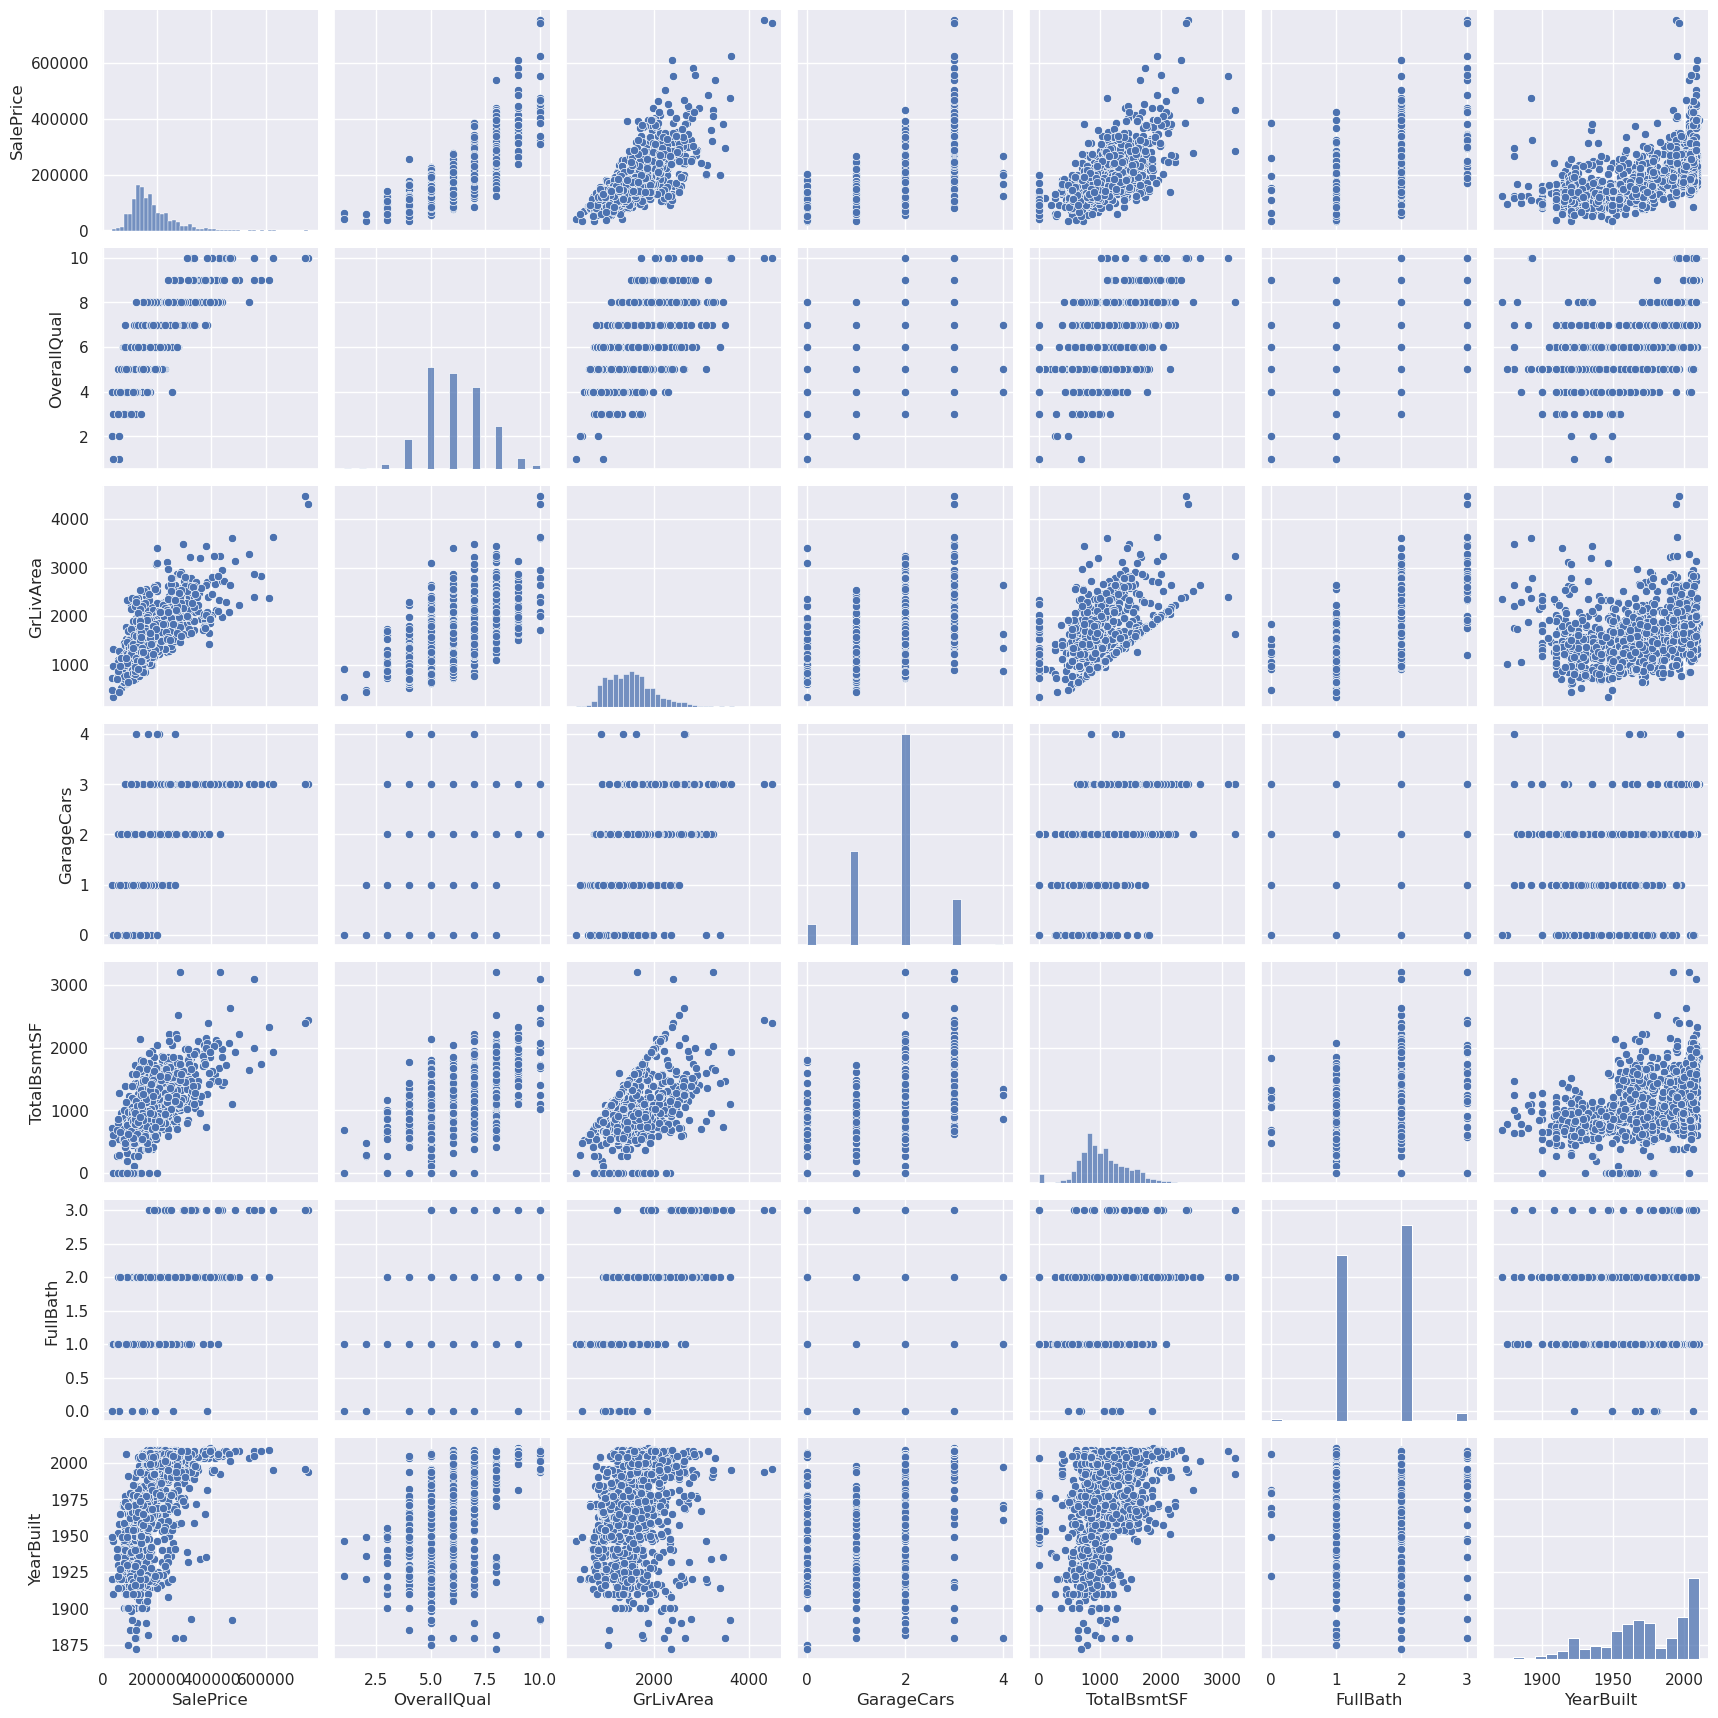

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

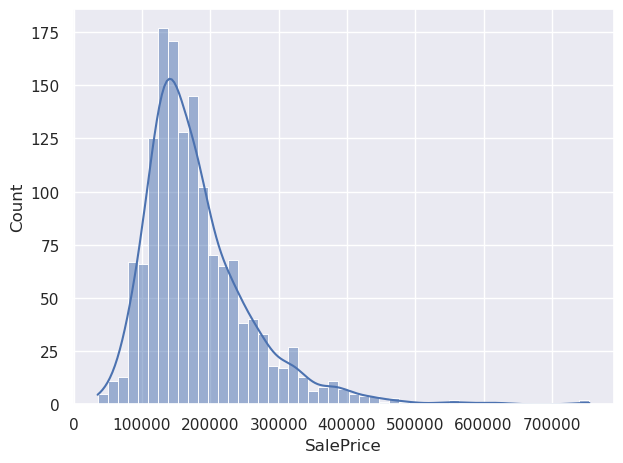

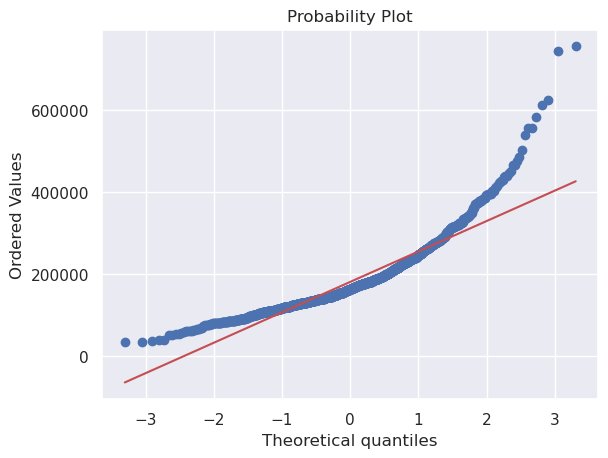

In [17]:
#histogram and normal probability plot
from scipy import stats
sns.histplot(df['SalePrice'], kde=True)
plt.tight_layout()
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

We will be applying log transformation to better support the methods we are going to be using

In [18]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

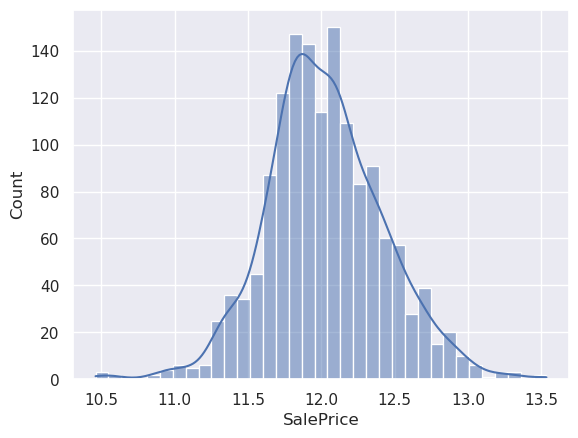

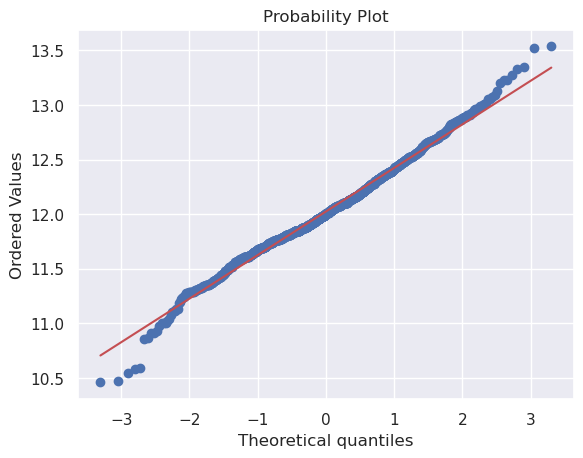

In [19]:
#transformed histogram and normal probability plot
sns.histplot(df['SalePrice'], kde=True)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

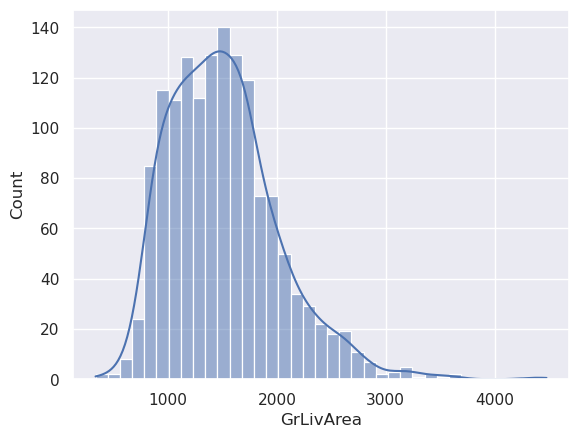

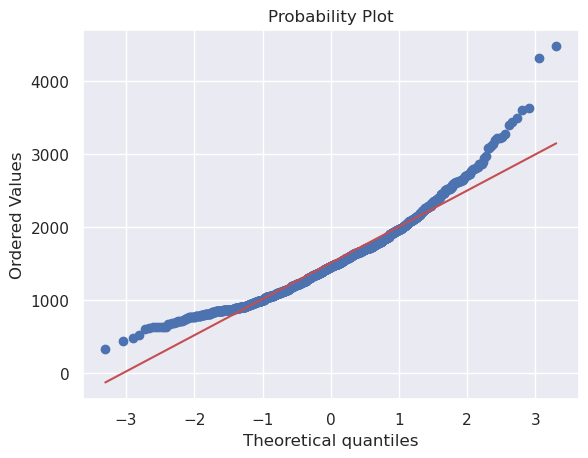

In [20]:
#histogram and normal probability plot
sns.histplot(df['GrLivArea'], kde=True);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

In [21]:
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])

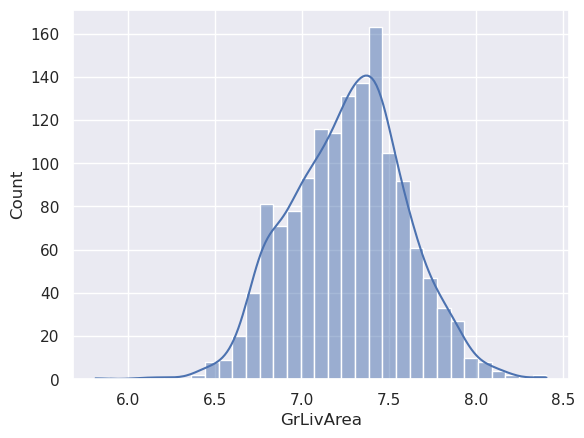

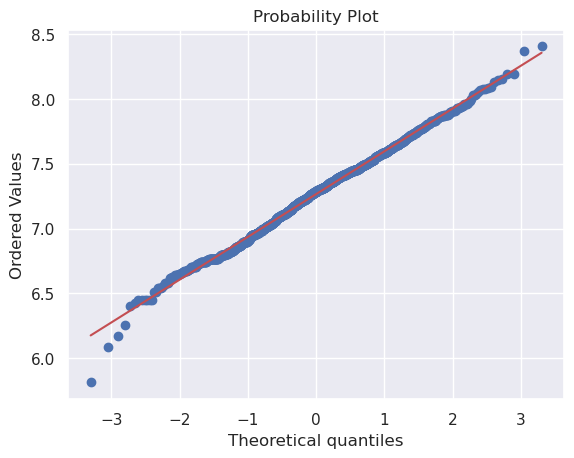

In [22]:
#transformed histogram and normal probability plot
sns.histplot(df['GrLivArea'], kde=True);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

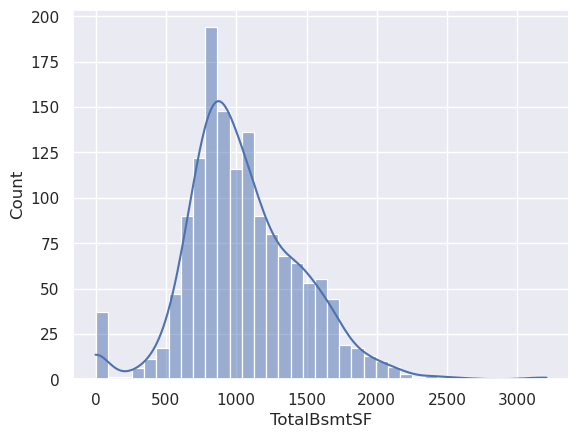

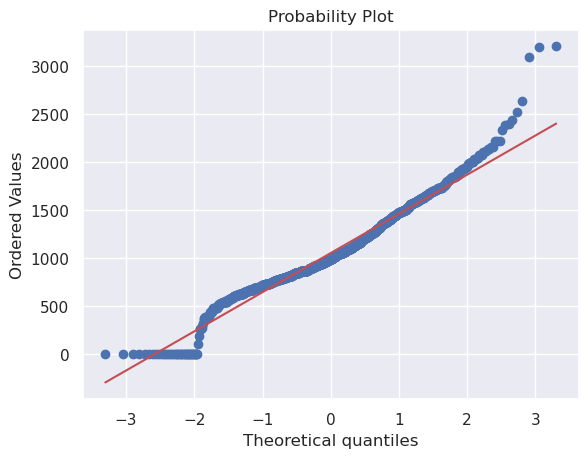

In [23]:
#histogram and normal probability plot
sns.histplot(df['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

In [24]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [25]:
#transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


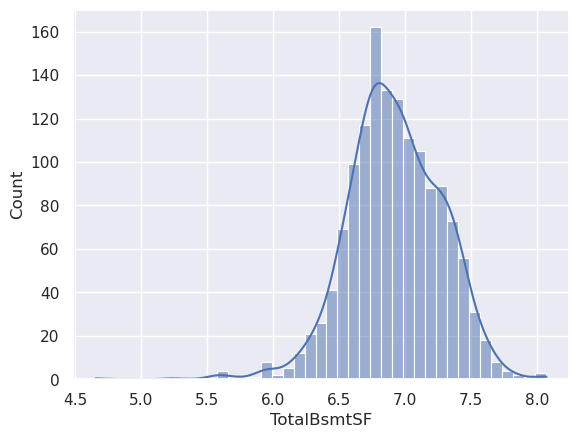

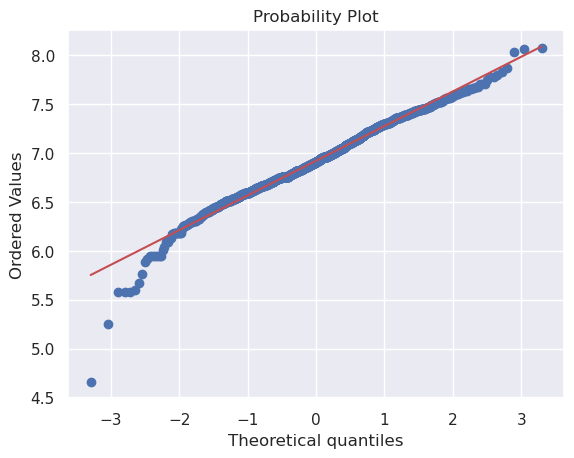

In [26]:
#histogram and normal probability plot
sns.histplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

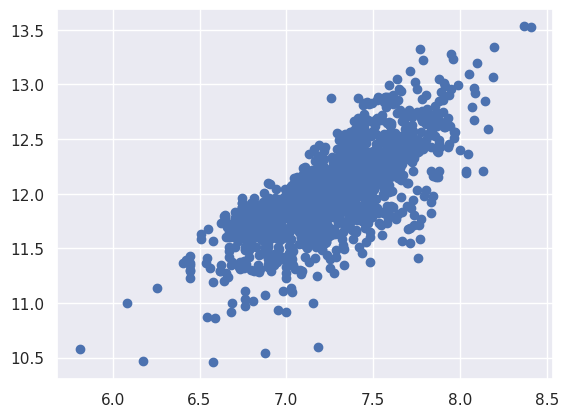

In [27]:
#scatter plot
plt.scatter(df['GrLivArea'], df['SalePrice']);

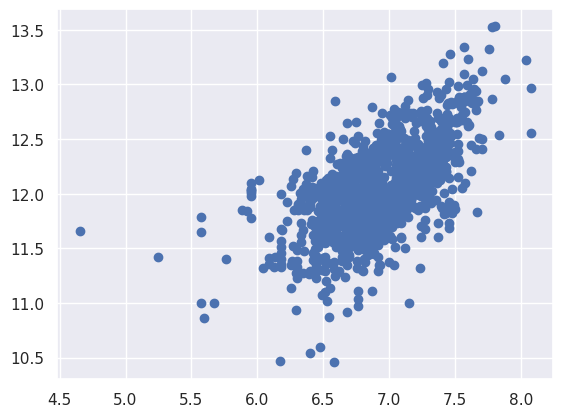

In [28]:
#scatter plot
plt.scatter(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], df[df['TotalBsmtSF']>0]['SalePrice']);

# Training the model
We are going to be using XGBoost because it has been shown to effective for such problems.
We will need to use one-hot encoding for the categorical values

In [29]:

df2 = df.copy()
df2 = df2.drop(['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu','LotFrontage'], axis=1)
# After flattening the data using one-hot encoding some of the columns do not exist in the trees
# We are doing this to remove such columns
# TODO: May be there is a better way of handling this  
               
df2.drop(df2[df2['Condition2'] == 'RRAn'].index, inplace=True)  
df2.drop(df2[df2['Condition2'] == 'RRNn'].index, inplace=True)  
df2.drop(df2[df2['HouseStyle'] == '2.5Fin'].index, inplace=True)          
df2.drop(df2[df2['RoofMatl'] == 'Membran'].index, inplace=True) 
df2.drop(df2[df2['RoofMatl'] == 'Metal'].index, inplace=True) 
df2.drop(df2[df2['RoofMatl'] == 'Roll'].index, inplace=True)  
df2.drop(df2[df2['Exterior1st'] == 'ImStucc'].index, inplace=True)  
df2.drop(df2[df2['Exterior1st'] == 'Stone'].index, inplace=True)  
df2.drop(df2[df2['Exterior2nd'] == 'Other'].index, inplace=True)  
df2.drop(df2[df2['Heating'] == 'Floor'].index, inplace=True)  
df2.drop(df2[df2['Heating'] == 'OthW'].index, inplace=True)  
df2.drop(df2[df2['Electrical'] == 'Mix'].index, inplace=True)  
df2.drop(df2[df2['GarageQual'] == 'Ex'].index, inplace=True)
df2.drop(df2[df2['Utilities'] == 'NoSeWa'].index, inplace=True)
df2.drop(df2[df2['Condition2'] == 'RRAe'].index, inplace=True)
#convert categorical variable into dummy
df_train = pd.get_dummies(df2)
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,2003.0,2,0,61,0,0,0,0,0,2,2008,12.247694,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,1976.0,2,298,0,0,0,0,0,0,5,2007,12.109011,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,2001.0,2,0,42,0,0,0,0,0,9,2008,12.317167,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,6.628041,756,0,7.448334,1,0,1,0,3,1,7,1,1998.0,3,0,35,272,0,0,0,0,2,2006,11.849398,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,2000.0,3,192,84,0,0,0,0,0,12,2008,12.429216,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Here we are splitting our training data to train and test the model

In [30]:
from sklearn.model_selection import train_test_split
y = df_train['SalePrice']
model_df = df_train.drop(['SalePrice','Id'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(model_df, y)
model_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,...,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,2003.0,2,0,61,0,0,0,0,0,2,2008,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,1976.0,2,298,0,0,0,0,0,0,5,2007,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,2001.0,2,0,42,0,0,0,0,0,9,2008,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,6.628041,756,0,7.448334,1,0,1,0,3,1,7,1,1998.0,3,0,35,272,0,0,0,0,2,2006,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,2000.0,3,192,84,0,0,0,0,0,12,2008,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,6.859615,694,0,7.406711,0,0,2,1,3,1,7,1,1999.0,2,0,40,0,0,0,0,0,8,2007,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,7.340836,0,0,7.636752,1,0,2,0,3,1,7,2,1978.0,2,349,0,0,0,0,0,0,2,2010,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,0.0,275,0,877,7.049255,1152,0,7.757906,0,0,2,0,4,1,9,2,1941.0,1,0,60,0,0,0,0,2500,5,2010,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,6.982863,0,0,6.982863,1,0,1,0,2,1,5,0,1950.0,1,366,0,112,0,0,0,0,4,2010,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0

We are using Root Mean Squared Error to see how effective the model was at predicting the price

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import math

model = xgb.XGBRegressor(seed = 1444 ,
min_child_weight = 8 ,
max_depth = 3 ,
learning_rate = 0.12570000000000076 ,
gamma = 0.0014900000000000013,early_stopping_rounds=10)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
preds = model.predict(X_test)
print('*'*30)
rmse = round(math.sqrt(mean_squared_error(preds, y_test)),3)
print('RMSE: {}\n'.format(rmse)) 

[0]	validation_0-rmse:10.13241
[1]	validation_0-rmse:8.86957
[2]	validation_0-rmse:7.76560
[3]	validation_0-rmse:6.79594
[4]	validation_0-rmse:5.94811
[5]	validation_0-rmse:5.20754
[6]	validation_0-rmse:4.55876
[7]	validation_0-rmse:3.99244
[8]	validation_0-rmse:3.49604
[9]	validation_0-rmse:3.06255
[10]	validation_0-rmse:2.68210
[11]	validation_0-rmse:2.35176
[12]	validation_0-rmse:2.06097
[13]	validation_0-rmse:1.80619
[14]	validation_0-rmse:1.58360
[15]	validation_0-rmse:1.38864
[16]	validation_0-rmse:1.21807
[17]	validation_0-rmse:1.06968
[18]	validation_0-rmse:0.94002
[19]	validation_0-rmse:0.82754
[20]	validation_0-rmse:0.72810
[21]	validation_0-rmse:0.64149
[22]	validation_0-rmse:0.56587
[23]	validation_0-rmse:0.49979
[24]	validation_0-rmse:0.44297
[25]	validation_0-rmse:0.39259
[26]	validation_0-rmse:0.34936
[27]	validation_0-rmse:0.31259
[28]	validation_0-rmse:0.28066
[29]	validation_0-rmse:0.25301
[30]	validation_0-rmse:0.22913
[31]	validation_0-rmse:0.20926
[32]	validation_0

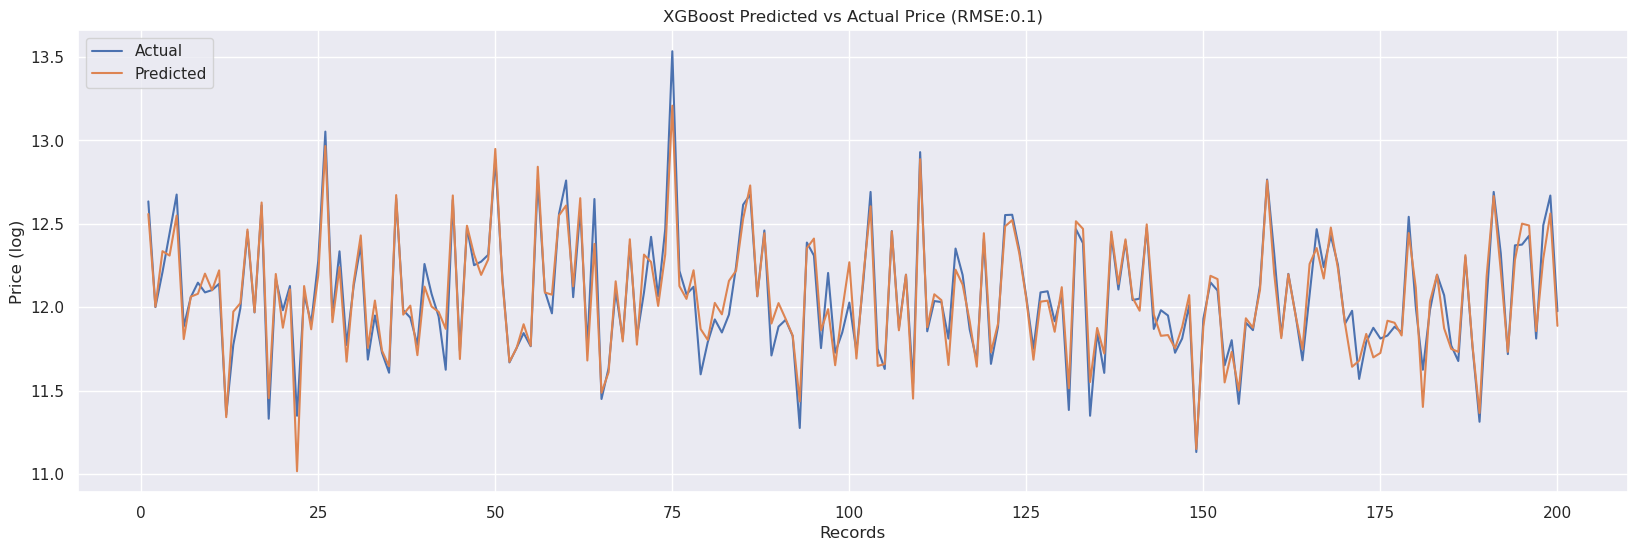

In [32]:
num_records = 200
x = np.linspace(1,364,364)[:num_records]
plt.figure(figsize=(20,6))
plt.title("XGBoost Predicted vs Actual Price (RMSE:{})".format(rmse))
plt.plot(x, y_test[:num_records], label="Actual")
plt.plot(x,preds[:num_records], label="Predicted")
plt.xlabel("Records")
plt.ylabel("Price (log)")
plt.legend(loc="upper left")
plt.show()


# Tuning the model
Here we are going to be using GridSearchCV and other methods to tune the model's parameters.\
Also we will be trying to see if imputation will improve the model's prediction.


There are no **PoolArea** without **PoolQC** 

In [33]:
qc = df[df['PoolQC'].isna()]
qc = qc[qc['PoolArea'] > 0]

Replace all null values for Pool Quality (**PoolQC**)

In [34]:
df['PoolQC'].replace(np.nan, 'None', regex=True, inplace=True)

In [35]:
df.isna().sum().sort_values(ascending=False)

MiscFeature    1404
Alley          1367
Fence          1177
FireplaceQu     690
LotFrontage     259
               ... 
TotalBsmtSF       0
Heating           0
MSSubClass        0
CentralAir        0
HasBsmt           0
Length: 80, dtype: int64

In [36]:
df['MiscFeature'].replace(np.nan, 'None', regex=True, inplace=True)
df['Alley'].replace(np.nan, 'None', regex=True, inplace=True)
df['Fence'].replace(np.nan, 'None', regex=True, inplace=True)
df['FireplaceQu'].replace(np.nan, 'None', regex=True, inplace=True)

In [37]:
garage_categorical = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for variable in garage_categorical:
    df[variable].replace(np.nan, 'None', regex=True, inplace=True)

Dropped **GarageCars** because it give the same data as **GarageArea**

In [38]:
df.isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
               ... 
Exterior2nd       0
Exterior1st       0
RoofMatl          0
RoofStyle         0
HasBsmt           0
Length: 80, dtype: int64

In [39]:
garage_numeric = ['GarageYrBlt']

for variable in garage_numeric:
    df[variable].replace(np.nan, 0, regex=True, inplace=True)

In [40]:
basement_categorical = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for variable in basement_categorical:
    df[variable].replace(np.nan, 'None', regex=True, inplace=True)

In [41]:
basement_numeric = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for variable in basement_numeric:
    df[variable].replace(np.nan, 0, regex=True, inplace=True)    
    
df['MasVnrType'].replace(np.nan, 'None', regex=True, inplace=True)
df['MasVnrArea'].replace(np.nan, 0, regex=True, inplace=True)

df['Functional'].replace(np.nan, 'Typ', regex=True, inplace=True)

**Impute categorical data**

In [42]:
def mode_impute(variable, impute=False):
    print('# of missing values: ' + str(df[variable].isna().sum()))
    
    if impute:
        df[variable].replace(np.nan, df[variable].mode()[0], regex=True, inplace=True)
        print("Imputed: {}".format(df[variable].mode()[0]))


In [43]:
mode_impute('Electrical', impute=True)
mode_impute('Exterior1st', impute=True)
mode_impute('Exterior2nd', impute=True)
mode_impute('LotFrontage', impute=False)

# of missing values: 1
Imputed: SBrkr
# of missing values: 0
Imputed: VinylSd
# of missing values: 0
Imputed: VinylSd
# of missing values: 259


In [44]:
df.isna().sum().sort_values(ascending=False)

LotFrontage     259
Id                0
KitchenAbvGr      0
GarageYrBlt       0
GarageType        0
               ... 
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
HasBsmt           0
Length: 80, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
y = df_train['SalePrice']
model_df = df_train.drop(['SalePrice','Id'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(model_df, y)
model_df.head()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,...,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,2003.0,2,0,61,0,0,0,0,0,2,2008,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,1976.0,2,298,0,0,0,0,0,0,5,2007,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,2001.0,2,0,42,0,0,0,0,0,9,2008,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,6.628041,756,0,7.448334,1,0,1,0,3,1,7,1,1998.0,3,0,35,272,0,0,0,0,2,2006,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,2000.0,3,192,84,0,0,0,0,0,12,2008,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [46]:
X_train.isnull().sum().sort_values(ascending=False)

GarageYrBlt              53
MasVnrArea                6
MSSubClass                0
BsmtQual_Ex               0
BsmtCond_Gd               0
                         ..
Condition1_RRNe           0
Condition1_RRNn           0
Condition2_Artery         0
Condition2_Feedr          0
SaleCondition_Partial     0
Length: 251, dtype: int64

In [47]:
X_train = X_train.fillna(0)
X_train.isnull().sum().sort_values(ascending=False)

MSSubClass               0
BsmtCond_Po              0
ExterCond_TA             0
Foundation_BrkTil        0
Foundation_CBlock        0
                        ..
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
SaleCondition_Partial    0
Length: 251, dtype: int64

Here we try to see if selecting the best columns will yield a better RMSE score

In [48]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([3.07055650e-01, 1.28044652e-01, 5.63802847e-01, 1.28015875e-01,
       3.66738429e-01, 2.41743315e-01, 9.13773026e-02, 1.57552794e-01,
       1.16587086e-02, 1.33681710e-01, 3.22382154e-01, 2.20087155e-01,
       2.75186542e-03, 4.86351503e-01, 4.86726980e-02, 2.02472848e-02,
       2.90802048e-01, 8.52898336e-02, 7.80119582e-02, 2.45916013e-02,
       2.20010692e-01, 1.77198505e-01, 2.95463362e-01, 3.65899333e-01,
       1.04314114e-01, 1.58241604e-01, 3.44086423e-02, 1.93579011e-03,
       1.38169560e-02, 0.00000000e+00, 4.65885122e-04, 0.00000000e+00,
       3.12217905e-02, 2.11084884e-02, 1.45154740e-02, 3.10985322e-02,
       2.35376249e-03, 3.58086500e-02, 6.68884871e-02, 0.00000000e+00,
       0.00000000e+00, 8.92009018e-02, 1.43419094e-02, 4.90490391e-04,
       1.02857456e-01, 1.29877888e-02, 7.34599523e-03, 0.00000000e+00,
       2.75753394e-03, 3.66290961e-04, 9.92146868e-04, 1.96369697e-02,
       2.79521058e-04, 0.00000000e+00, 2.63383034e-02, 0.00000000e+00,
      

In [49]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual            0.563803
GrLivArea              0.486352
YearBuilt              0.366738
GarageCars             0.365899
TotalBsmtSF            0.322382
                         ...   
Condition1_Norm        0.000000
Condition1_Feedr       0.000000
Exterior1st_BrkComm    0.000000
GarageQual_Gd          0.000000
LandSlope_Gtl          0.000000
Length: 251, dtype: float64

<AxesSubplot:>

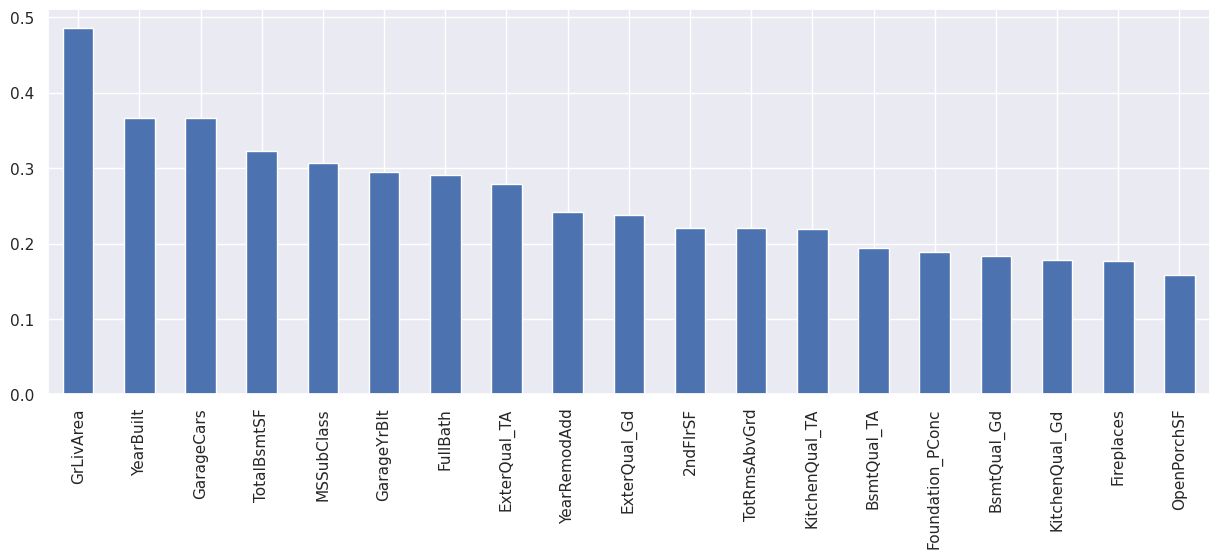

In [50]:
mutual_info.sort_values(ascending=False)[1:20].plot.bar(figsize=(15, 5))

In [51]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=15)
selected_top_columns.fit(X_train.fillna(0), y_train)
# type(X_train)

SelectPercentile(percentile=15,
                 score_func=<function mutual_info_regression at 0x7f91cc5ddb90>)

In [52]:
columns = X_train.columns[selected_top_columns.get_support()]
columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'LotShape_Reg', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_Unf'],
      dtype='object')

In [53]:
# Selection of top X percentile columns in mutual info did not improve the RMSE
# X_train = X_train[columns]
# X_test = X_test[columns]
# X_train

Here we are using grid search CV to find appropriate parameters for our model

In [54]:
# seed = 1234 ,
# min_child_weight = 4 ,
# max_depth = 3 ,
# learning_rate = 0.1535000000000021 ,
# gamma = 0.0029400000000000003
params={
 "learning_rate"    : np.arange(0.1,0.2, 0.0001),
#  "reg_alpha"    : np.arange(0.09,0.1, 0.001),
 "max_depth"        : [ 2,3,4,5,6],
 "min_child_weight" : [ 2,3,4,5,6,7,8 ],
 "gamma"            : np.arange(0.001,0.003, 0.00001),
#  "colsample_bytree" : np.arange(0.276,0.277, 0.000001),
 "seed": np.linspace(1000, 5000, 10, dtype=int), 
#  "n_estimators": [57,58,69,60],  
#  "reg_lambda": np.arange(1e-05,1.08e-05, 0.00000001), 
#  "subsample": np.arange(0.828,0.83, 0.00001),
#  "booster": ["gblinear","gblinear", "dart"] 
}

In [55]:
## Hyperparameter optimization using RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import xgboost

# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
# classifier=xgboost.XGBRegressor(objective='reg:squarederror')
# random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
# from datetime import datetime
# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X_train,y_train)
# timer(start_time) # timing ends here for "start_time" variable
        
# random_search.best_estimator_

In [56]:
# random_search.best_params_

In [57]:
# This makes it eaiser to plug this into the params
def f(dictionary):
    for key in dictionary:
        print(key,'=',dictionary[key],',')

# f(random_search.best_params_)

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import math
# RMSE: 0.11
# seed = 3666 ,
# min_child_weight = 2 ,
# max_depth = 4 ,
# learning_rate = 0.10220000000000007 ,
# gamma = 0.002840000000000005
model = xgb.XGBRegressor(seed = 3666 ,
min_child_weight = 2 ,
max_depth = 4 ,
learning_rate = 0.10220000000000007 ,
gamma = 0.002840000000000005)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
preds = model.predict(X_test)
print('RMSE: {}\n'.format(math.sqrt(mean_squared_error(preds, y_test)))) # 0.12477007481392519 (Before percentiles) 
preds

[0]	validation_0-rmse:10.35439
[1]	validation_0-rmse:9.29866
[2]	validation_0-rmse:8.35090
[3]	validation_0-rmse:7.50092
[4]	validation_0-rmse:6.73776
[5]	validation_0-rmse:6.05173
[6]	validation_0-rmse:5.43655
[7]	validation_0-rmse:4.88257
[8]	validation_0-rmse:4.38495
[9]	validation_0-rmse:3.93874
[10]	validation_0-rmse:3.53901
[11]	validation_0-rmse:3.17957
[12]	validation_0-rmse:2.85696
[13]	validation_0-rmse:2.56694
[14]	validation_0-rmse:2.30707
[15]	validation_0-rmse:2.07318
[16]	validation_0-rmse:1.86363
[17]	validation_0-rmse:1.67537
[18]	validation_0-rmse:1.50768
[19]	validation_0-rmse:1.35592
[20]	validation_0-rmse:1.22060
[21]	validation_0-rmse:1.09764
[22]	validation_0-rmse:0.98822
[23]	validation_0-rmse:0.89127
[24]	validation_0-rmse:0.80346
[25]	validation_0-rmse:0.72442
[26]	validation_0-rmse:0.65469
[27]	validation_0-rmse:0.59133
[28]	validation_0-rmse:0.53497
[29]	validation_0-rmse:0.48487
[30]	validation_0-rmse:0.43931
[31]	validation_0-rmse:0.39944
[32]	validation_0

array([12.382124 , 12.2326355, 11.921731 , 12.01549  , 12.826581 ,
       11.701662 , 12.05582  , 11.869263 , 12.512405 , 12.009149 ,
       13.029446 , 12.162948 , 13.030336 , 11.750913 , 12.320089 ,
       11.706565 , 11.740295 , 11.828417 , 12.150246 , 12.467336 ,
       11.920051 , 11.877201 , 12.030406 , 11.925549 , 11.656304 ,
       11.46104  , 11.59744  , 11.874466 , 11.81125  , 11.871812 ,
       11.6769905, 12.341713 , 12.085607 , 12.092558 , 11.365076 ,
       12.1577835, 12.039752 , 11.686468 , 12.277337 , 11.698332 ,
       11.919523 , 12.617324 , 12.046882 , 11.861494 , 11.801931 ,
       11.842864 , 11.742319 , 11.803132 , 12.444717 , 12.052517 ,
       12.152484 , 11.941786 , 12.039573 , 12.034712 , 11.612626 ,
       12.346218 , 12.017805 , 12.128562 , 11.376792 , 11.659462 ,
       12.2928095, 11.676042 , 12.2634945, 12.472263 , 11.870792 ,
       12.241017 , 11.777285 , 11.945508 , 12.32958  , 12.554472 ,
       11.524214 , 11.932532 , 12.204606 , 12.138118 , 12.2339

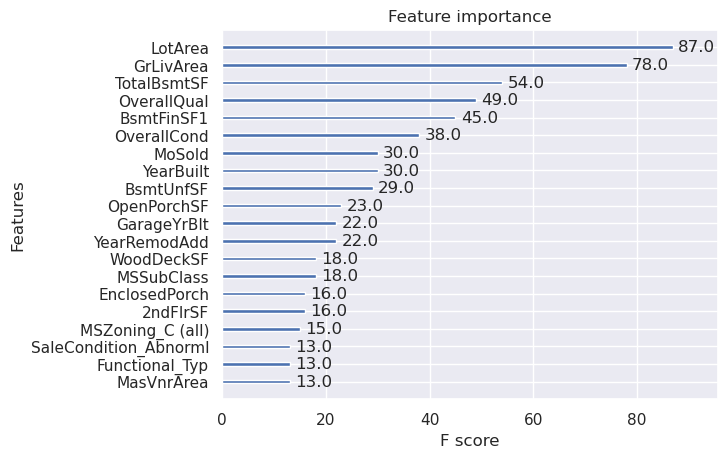

In [59]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20) # top 10 most important features
plt.show()

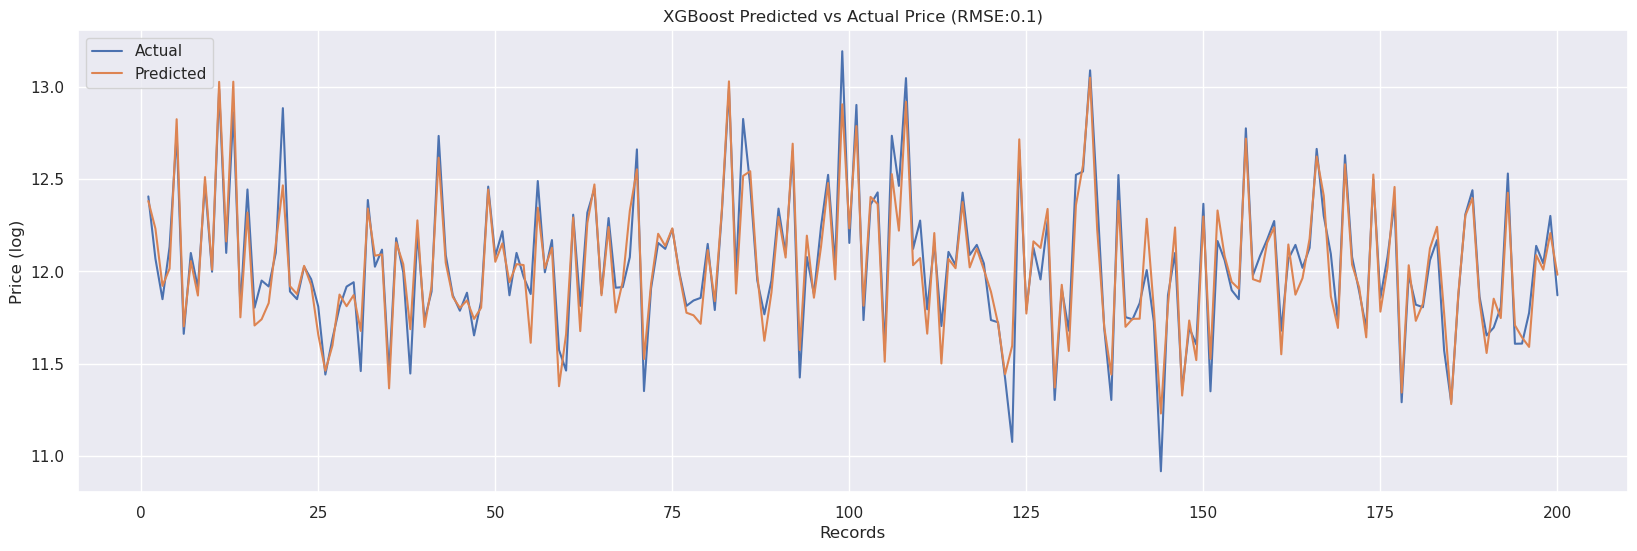

In [60]:
num_records = 200
x = np.linspace(1,364,364)[:num_records]
plt.figure(figsize=(20,6))
plt.title("XGBoost Predicted vs Actual Price (RMSE:{})".format(rmse))
plt.plot(x, y_test[:num_records], label="Actual")
plt.plot(x,preds[:num_records], label="Predicted")
plt.xlabel("Records")
plt.ylabel("Price (log)")
plt.legend(loc="upper left")
plt.show()

# Testing the model with different data (test.csv)

In [61]:
#  Submission
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [62]:
test_df.shape

(1459, 80)

In [63]:
test_df.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [64]:
# df = test_df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
df_Id = test_df['Id']
df = test_df.drop(['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu','LotFrontage'], axis=1)
#Drop to avoid multicolinearlity
df = df.drop(['GarageArea'], axis=1)
df = df.drop(['1stFlrSF'], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


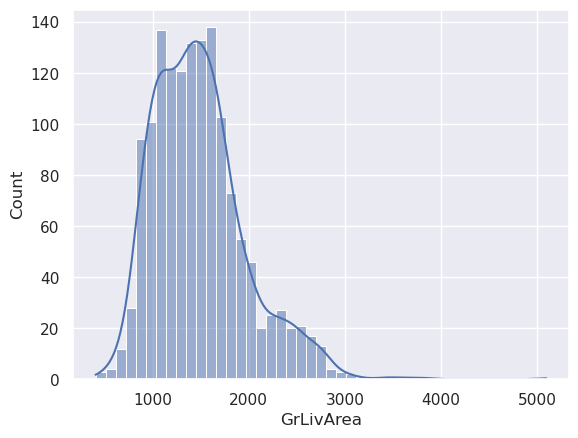

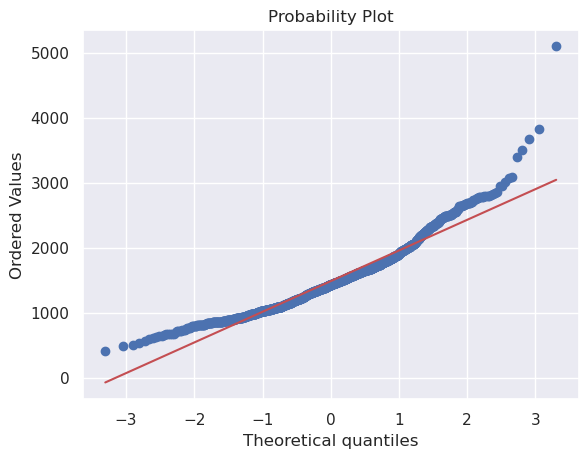

In [65]:

#histogram and normal probability plot
sns.histplot(df['GrLivArea'], kde=True)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

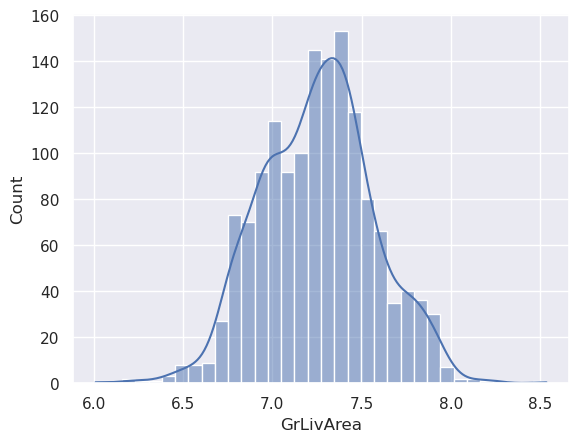

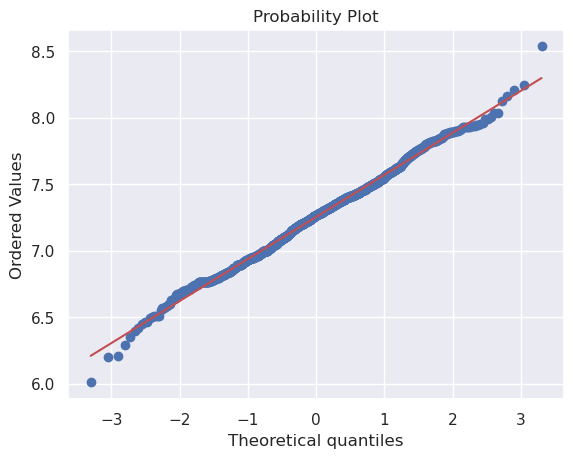

In [66]:
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])
#transformed histogram and normal probability plot
sns.histplot(df['GrLivArea'], kde=True)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

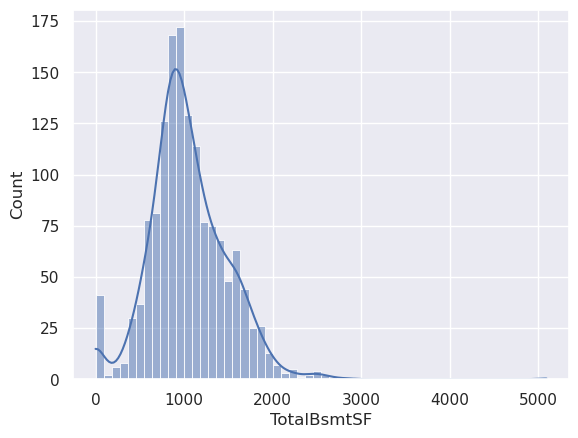

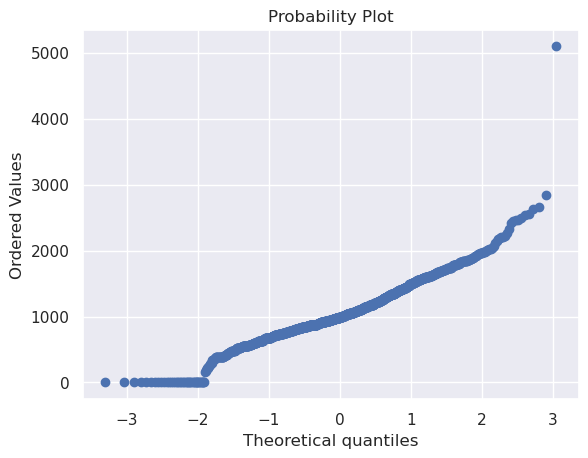

In [67]:
#histogram and normal probability plot
sns.histplot(df['TotalBsmtSF'], kde=True)
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

In [68]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [69]:
#transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


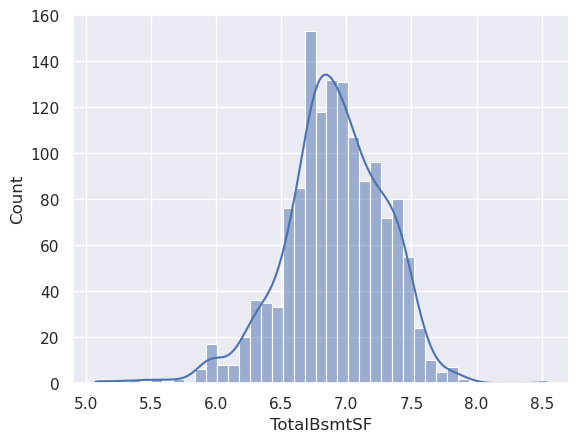

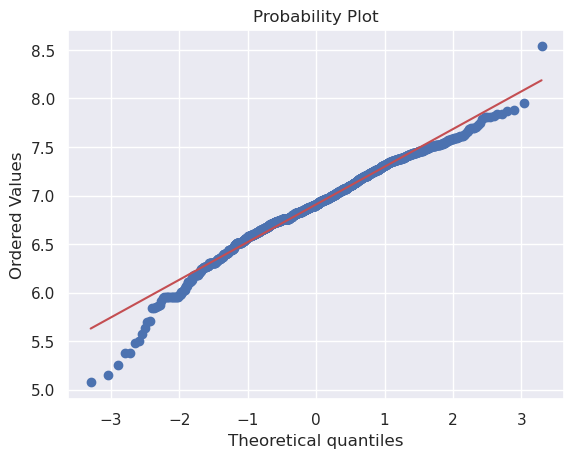

In [70]:
#histogram and normal probability plot
sns.histplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [71]:
df2 = df.copy()
# df2.drop(df[df['GarageCond'] == 'Ex'].index, inplace=True)
test_Ids = df2['Id']
df2.drop(['Id'], axis=1, inplace=True)
df_final_test = pd.get_dummies(df2)
df_final_test.columns
df_final_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,...,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,6.782192,0,0,6.797940,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,140,0,0,0,120,0,0,6,2010,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,393,36,0,0,0,0,12500,6,2010,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,212,34,0,0,0,0,0,3,2010,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,360,36,0,0,0,0,0,6,2010,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,120,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,0,82,0,0,144,0,0,1,2010,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0,0,0,0,0,0,0,6,2006,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,160,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,0,24,0,0,0,0,0,4,2006,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,20,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,474,0,0,0,0,0,0,9,2006,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,85,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,6.815640,0,0,6.877296,0.0,1.0,1,0,3,1,6,0,NaN,0.0,80,32,

In [72]:
# df_final_test.drop(['GarageCond_Ex'], axis=1, inplace=True)
df_final_test.drop(['GarageCond_Ex'], axis=1, inplace=True)
test_preds = model.predict(df_final_test)
# test_preds
train_columns = df_train.columns.values
test_columns = df_final_test.columns.values
for col in train_columns:
    if col not in df_final_test.columns.values:
        print(col)
print('*'*20)
for col in test_columns:
    if col not in train_columns:
        print(col)

test_preds = np.exp(test_preds)
test_preds

Id
SalePrice
********************


array([124597.33 , 160262.83 , 179873.47 , ..., 166742.2  , 123357.305,
       228268.5  ], dtype=float32)

In [73]:
pred_df = pd.DataFrame(test_preds, index=test_Ids, columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')
pred_df

,SalePrice
Id,
1461,124597.328125
1462,160262.828125
1463,179873.468750
1464,181447.343750
1465,189326.234375
...,...
2915,82090.492188
2916,86342.429688
2917,166742.203125


# References:
* https://www.kaggle.com/code/yaginun/crisp-dm-process-on-the-airbnb-dataset
* https://www.kaggle.com/code/sandhyakrishnan02/normal-distribution-skewness-and-kurtosis
